<a href="https://colab.research.google.com/github/VictorPetch/Baby-Cry/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SOM
# from https://www.superdatascience.com/deep-learning/ 


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Running setup.py bdist_wheel for minisom ... - done
  Stored in directory: /root/.cache/pip/wheels/4a/5c/75/d21b1b07292ccd8720a8076304f793031e016c16e9c8eacbf9
Successfully built minisom


In [4]:
# Getting Data
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "High_Thrash.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/VictorPetch/Baby-Cry/master/"
DATA_URL = DOWNLOAD_ROOT  + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, file_to_download=FILE_TO_DOWNLOAD):
  
  urllib.request.urlretrieve(data_url,file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls Low_High_Thrash.csv

ls: cannot access 'Low_High_Thrash.csv': No such file or directory


In [5]:
# Importing the dataset
dataset = pd.read_csv(FILE_TO_DOWNLOAD)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


dataset.head()





,Files,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F11,F12,F13,F14,F15,F16,F17,F18,F19,Class
0,BellyPain05,2480.263158,2297.222222,2384.795322,2303.801170,2497.514620,2242.982456,2368.421053,2494.152047,2467.836257,...,2477.777778,2296.345029,2353.362573,2365.935673,2451.461988,2309.356725,2327.046784,2304.385965,2343.421053,0
1,BellyPain06,1219.648094,1219.501466,1219.354839,1217.302053,1220.087977,1213.929619,1214.516129,2421.114370,2421.260997,...,1217.448680,405.865103,1217.595308,1212.170088,1217.155425,1219.794721,405.718475,1099.266862,406.304985,0
2,BellyPain08,1301.169591,1298.391813,841.812865,1298.830409,1326.169591,1312.134503,829.093567,1293.713450,843.128655,...,1295.614035,823.684211,837.280702,832.748538,860.087719,1300.292398,1247.076023,838.742690,1373.391813,0
3,Cold_Hot08,2177.339181,2177.631579,2176.900585,2176.461988,2177.192982,2176.754386,2177.046784,2177.777778,2177.923977,...,2176.315789,2178.362573,2178.654971,1515.204678,2175.730994,2176.169591,2178.216374,2176.608187,2176.023392,0
4,Cold_Hot09,827.927928,828.528529,859.609610,865.465465,904.204204,827.177177,834.834835,859.459459,828.678679,...,859.759760,875.825826,839.489489,860.360360,901.201201,853.753754,896.846847,827.027027,896.246246,0


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
#z = sc.fit_transform(z)


In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 12, y = 12, input_len = 20, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_batch(data = X, num_iteration = 300)

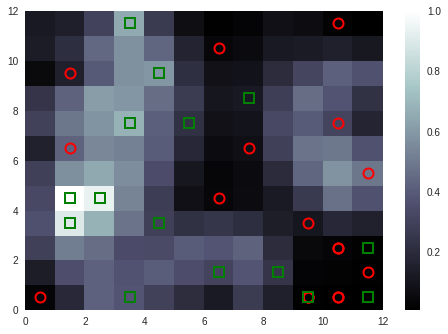

In [8]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's','*']
colors = ['r', 'g','m']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [9]:
z = 858.9939024390244, 858.8414634146342, 859.1463414634146, 859.451219512195, 858.6890243902438, 876.0670731707316, 859.6036585365854, 859.2987804878048, 860.9756097560976, 876.9817073170732, 875.9146341463414, 862.6524390243902, 876.8292682926829, 862.3475609756098, 862.5, 859.7560975609756, 880.030487804878, 860.8231707317073, 861.1280487804878, 896.951219512195
w = som.winner(z)
print(w)

(7, 4)
